In [1]:
%%capture --no-stderr
%pip install -U langgraph langchain-anthropic langchain openai langchain_community langchain_experimental matplotlib langchain_openai langchain_core
%pip install --upgrade langchain-openai


In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity
import getpass
import os
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from openai import OpenAI
from typing import Any, Dict, Literal, TypeVar, Generic, Annotated
from typing_extensions import TypedDict
from IPython.display import display, Image
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.graph.message import AnyMessage, add_messages
from sentence_transformers import SentenceTransformer

e:\anaconda3\envs\langraph\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:



def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

API Key: sk-SdjbKZ455Psww0ZoKvSl4as8dKai9i3CUQWikdz4w2QBA4Vq
URL: http://api2.aigcbest.top/

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatOpenAI(model ="gpt-4o", base_url="https://api2.aigcbest.top/v1", api_key="sk-SdjbKZ455Psww0ZoKvSl4as8dKai9i3CUQWikdz4w2QBA4Vq")
messages = [
    SystemMessage(content="Translate the following from English into Chinese"),
    HumanMessage(content="hi!"),
]
response = llm.invoke(messages)
print(type(response), response)

<class 'langchain_core.messages.ai.AIMessage'> content='你好！' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 20, 'total_tokens': 22, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f3927aa00d', 'finish_reason': 'stop', 'logprobs': None} id='run-3124d61d-997b-4d14-b023-c13a1ef18c96-0' usage_metadata={'input_tokens': 20, 'output_tokens': 2, 'total_tokens': 22, 'input_token_details': {}, 'output_token_details': {}}


In [ ]:
key='sk-SdjbKZ455Psww0ZoKvSl4as8dKai9i3CUQWikdz4w2QBA4Vq'


from openai import OpenAI

client = OpenAI(
    base_url="https://api2.aigcbest.top/v1",
    api_key=key
)

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "user", "content": "Hello?"},

  ]
)
print(response)

In [30]:
from typing import Any, Dict, Literal, TypeVar, Generic

T = TypeVar("T")

class Command(Generic[T]):
    def __init__(self, goto: T, update: Dict[str, Any]):
        self.goto = goto  # 指定下一个代理
        self.update = update  # 更新的状态信息
    def get_goto(self) -> str:
        return self.goto
    def get_update(self) -> Dict:
        return self.update
    def get_command(self):
        return {"goto": self.goto, "update": self.update}
C = Command("agent_1", {"key": "value"})
print(type(C))
print(dir(Command))

<class '__main__.Command'>
['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'get_command', 'get_goto', 'get_update']


In [3]:
command_instance = Command(goto="next_agent", update={"status": "success"})

# 获取并打印返回的字典
command_dict = command_instance.get_goto()
print(command_dict)

next_agent


In [10]:
from typing import Annotated, Literal
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState, START, END
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage, add_messages

model = ChatOpenAI(model ="gpt-4o", base_url="https://api2.aigcbest.top/v1", api_key="sk-SdjbKZ455Psww0ZoKvSl4as8dKai9i3CUQWikdz4w2QBA4Vq")

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


def should_continue(state: MessagesState) -> Literal[END, "agent_1", "agent_2","agent_3"]:
    print(state)
    goto = state["goto"]
    print(goto)
    return goto

def agent_1(state: MessagesState) -> Command[Literal["agent_2", "agent_3", END]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # to determine which agent to call next. a common pattern is to call the model
    # with a structured output (e.g. force it to return an output with a "next_agent" field)
    print(state)
    response = model.invoke(state["messages"] + [{"role": "user", "content": "Decide the next agent: agent_1, agent_2, agent_3, or __end__."}])
    print("*******")
    print(type(response))
    print(response)
    
    return {
        "goto": "agent_2",
        "update": {"messages": "Next one is agent_2"},
    }

def agent_2(state: MessagesState) -> Command[Literal["agent_1", "agent_3", END]]:
    print(state)
    response = model.invoke(state["messages"] + [{"role": "user", "content": "Decide the next agent: agent_1, agent_2, agent_3, or __end__."}])
    print("*******")
    print(type(response))
    print(response)
    #goto_agent = getattr(response, "next agent", END)  # 默认跳转到 END
    #updated_messages = state["messages"] + [{"role": "assistant", "content": response["content"]}]
    return {
        "goto": "agent_3",
        "update": {"messages": "Next one is agent_3"},
    }

def agent_3(state: MessagesState) -> Command[Literal["agent_1", "agent_2", END]]:
    print(state)
    response = model.invoke(state["messages"] + [{"role": "user", "content": "Decide the next agent: agent_1, agent_2, agent_3, or __end__."}])
    print("*******")
    print(type(response))
    print(response)
    #goto_agent = response.get("next agent", END)  # 默认跳转到 END
    #updated_messages = state["messages"] + [{"role": "assistant", "content": response["content"]}]
    return {
        "goto": END,
        "update": {"messages": "Next one is END"},
    }


workflow = StateGraph(MessagesState)

workflow.add_node(agent_1)
workflow.add_node(agent_2)
workflow.add_node(agent_3)

workflow.add_edge(START, "agent_1")
workflow.add_conditional_edges("agent_1",should_continue)
workflow.add_conditional_edges("agent_2", should_continue)
workflow.add_edge("agent_3", END)

builder = StateGraph(MessagesState)
builder.add_node(agent_1)
builder.add_node(agent_2)
builder.add_node(agent_3)

builder.add_edge(START, "agent_1")
builder.add_edge("agent_1", "agent_2")
builder.add_edge("agent_2", "agent_3")
builder.add_edge("agent_3", END)
network = workflow.compile()

ImportError: cannot import name 'Command' from 'langgraph' (unknown location)

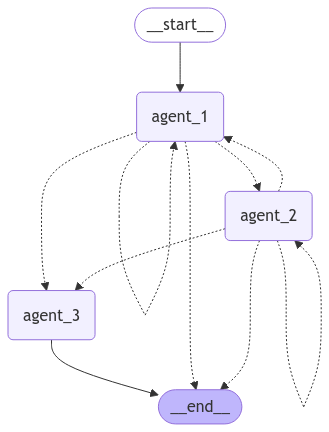

In [5]:
from IPython.display import display, Image

display(Image(network.get_graph().draw_mermaid_png()))

In [11]:
from langchain_core.messages import convert_to_messages


def pretty_print_messages(update):
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")

    for node_name, node_update in update.items():
        print(f"Update from node {node_name}:")
        print("\n")

        for m in convert_to_messages(node_update["messages"]):
            m.pretty_print()
        print("\n")

In [12]:
# Initialize the starting state
initial_state = MessagesState(messages={"role":"user", "content": "Randomly choose the next agent: agent_1, agent_2, agent_3, or __end__. Say the next_agent is ..."})

# Run the state graph
result_state = network.invoke(initial_state)

# Print the final state messages
print("Final Messages State:")
print(result_state)

# Verify that the graph ran correctly
assert "agent_3 finished" in result_state["messages"], "Graph did not complete correctly!"
print("Test passed!")



{'messages': [HumanMessage(content='Randomly choose the next agent: agent_1, agent_2, agent_3, or __end__. Say the next_agent is ...', additional_kwargs={}, response_metadata={}, id='91d6b114-dde1-4118-9ed4-6480d1e93932')]}
*******
<class 'langchain_core.messages.ai.AIMessage'>
content='The next agent is agent_2.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 62, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f3927aa00d', 'finish_reason': 'stop', 'logprobs': None} id='run-71da333f-15d7-4665-9507-2c2478339081-0' usage_metadata={'input_tokens': 62, 'output_tokens': 8, 'total_tokens': 70, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning

AssertionError: Graph did not complete correctly!

# Start From HERE!!!

Choose the next agent: agent_4, agent_5, agent_6, or __end__. Say the next_agent is .... agent_4 is the most clever one. agent_5 is the most stupid one. agent_6 is the normal one.


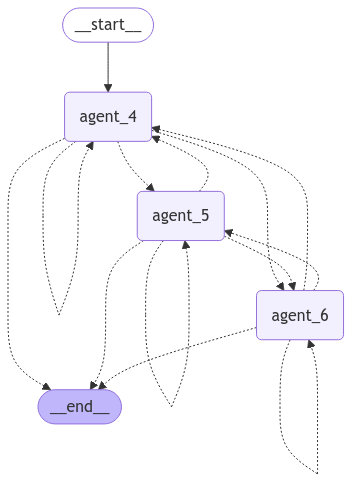

In [3]:
model = ChatOpenAI(model ="gpt-4o", base_url="https://api2.aigcbest.top/v1", api_key="sk-SdjbKZ455Psww0ZoKvSl4as8dKai9i3CUQWikdz4w2QBA4Vq")
class Agent_Message():
    def __init__(self, messages: list[str]):
        self.messages = messages
    def update(self, response: AIMessage):
        self.messages.append(response.content)
    def get_message(self):
        return self.messages

agent_messages = Agent_Message(messages=["Choose the next agent: agent_4, agent_5, agent_6, or __end__. Say the next_agent is .... agent_4 is the most clever one. agent_5 is the most stupid one. agent_6 is the normal one."])
print(agent_messages.get_message()[-1])

class AgentState:
    def __init__(self, name: str, health: int = 100, position=(0, 0), goal=None):
        self.name = name
        self.health = health
        self.position = position
        self.goal = goal
        self.history = ["This is the history of this agent decision."]  # 存储对话历史或行为决策
        self.decisionmessage = ["This is the decision message from the previous agent."]

    def update(self, key, value):
        setattr(self, key, value)

    def log(self, message):
        self.history.append(message)

    def decide(self, message):
        self.decisionmessage.append(message)

    def change(self):
        decision = self.history[-1]
        if "health down" in decision:
            self.update("health", max(0, self.health - 10))  # 限制最小为 0
            print(f"{self.name}'s health decreased to {self.health}")

        if "move to" in decision:
            new_position = (self.position[0] + 1, self.position[1] + 1)  # 例：向右下移动
            self.update("position", new_position)
            print(f"{self.name} moved to {self.position}")

        if "goal is" in decision:
            goal = decision.split("goal is ")[-1]  # 假设 GPT 输出 "goal is Find the hidden treasure"
            self.update("goal", goal)

    def prompt(self):
        return "You are the agent. Your goal is to reduce other's health value. If you want to hit others, you need to move to the postion next to them. Please decide what to do with the next agent."

    def update_prompt(self):
        return "You need to change your own state depending on the previous agent's decision. Please say health down if you think you are hitten. Please say move to so that you can move to the right and down position. Please say goal is and then what you want to do, to set your recent goal"

    def __repr__(self):
        return f"AgentState(name={self.name}, health={self.health}, position={self.position}, goal={self.goal})"

agent4_state = AgentState(name="agent_4")
agent5_state = AgentState(name="agent_5")
agent6_state = AgentState(name="agent_6")
public_state = AgentState(name="public")

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

def should_continue2(state: State) -> Literal["agent_4", "agent_5","agent_6", END]:
    messages = agent_messages.get_message()
    last_message = messages[-1]
    if "agent_4" in last_message:
        agent4_state.decide(public_state.decisionmessage[-1])
        print("Next is agent_4")
        return "agent_4"
    if "agent_5" in last_message:
        agent5_state.decide(public_state.decisionmessage[-1])
        print("Next is agent_5")
        return "agent_5"
    if "agent_6" in last_message:
        agent6_state.decide(public_state.decisionmessage[-1])
        print("Next is agent_6")
        return "agent_6"
    if "end" or "END" in last_message:
        print("Next is __end__")
        return END
    else:
        print("GG")
        return "agent_4"
def agent_4(state: State) -> dict[str, list[AIMessage]]:
    update_message = model.invoke([{"role": "assistant", "content": agent4_state.update_prompt() + agent4_state.__repr__() + agent4_state.decisionmessage[-1]}])
    agent4_state.log(update_message.content)
    agent4_state.change()
    print(agent4_state.__repr__())
    decision = model.invoke([{"role": "assistant", "content": agent4_state.prompt()}])
    public_state.decide(decision.content)
    last_message = agent_messages.get_message()
    print("This is last message: ", last_message[-1])
    response = model.invoke([{"role": "assistant", "content": last_message[-1]}] + [{"role": "user", "content": "Decide the next agent: agent_4, agent_5, agent_6, or __end__."}])
    print("Agent_4 says: ", response.content)
    agent_messages.update(response)
    return {"messages": response}
    

def agent_5(state: State) -> dict[str, list[AIMessage]]:
    update_message = model.invoke([{"role": "assistant", "content": agent5_state.update_prompt() + agent5_state.__repr__() + agent5_state.decisionmessage[-1]}])
    agent5_state.log(update_message.content)
    agent5_state.change()
    print(agent5_state.__repr__())
    decision = model.invoke([{"role": "assistant", "content": agent5_state.prompt()}])
    public_state.decide(decision.content)
    last_message = agent_messages.get_message()
    print("This is last message: ", last_message[-1])
    response = model.invoke([{"role": "assistant", "content": last_message[-1]}] + [{"role": "user", "content": "Decide the next agent: agent_4, agent_5, agent_6, or __end__."}])
    print("Agent_5 says: ", response.content)
    agent_messages.update(response)
    return {"messages": response}

    

def agent_6(state: State) -> dict[str, list[AIMessage]]:
    update_message = model.invoke([{"role": "assistant", "content": agent6_state.update_prompt() + agent6_state.__repr__() + agent6_state.decisionmessage[-1]}])
    agent6_state.log(update_message.content)
    agent6_state.change()
    print(agent6_state.__repr__())
    decision = model.invoke([{"role": "assistant", "content": agent6_state.prompt()}])
    public_state.decide(decision.content)
    last_message = agent_messages.get_message()
    print("This is last message: ", last_message[-1])
    response = model.invoke([{"role": "assistant", "content": last_message[-1]}] + [{"role": "user", "content": "Decide the next agent: agent_4, agent_5, agent_6, or __end__."}])
    print("Agent_6 says: ", response.content)
    agent_messages.update(response)
    return {"messages": response}


workflow2 = StateGraph(State)

workflow2.add_node(agent_4)
workflow2.add_node(agent_5)
workflow2.add_node(agent_6)

workflow2.add_edge(START, "agent_4")
workflow2.add_conditional_edges("agent_4", should_continue2)
workflow2.add_conditional_edges("agent_5",should_continue2)
workflow2.add_conditional_edges("agent_6", should_continue2)
network2 = workflow2.compile()

from IPython.display import display, Image

display(Image(network2.get_graph().draw_mermaid_png()))

In [ ]:
# Initialize the starting state
initial_state = MessagesState(messages={"role":"user", "content": "Randomly choose the next agent: agent_4, agent_5, agent_6, or __end__. Say the next_agent is ..."})
#agent_messages = Agent_Message(messages=[{"role":"user", "content": "Randomly choose the next agent: agent_4, agent_5, agent_6, or __end__. Say the next_agent is ..."}])
# Run the state graph
input_messages = {"messages": [{"role": "user", "content": "I think agent_5 should be the next agent. Which agent do you think should be the next one?"}]}
result_state = network2.invoke(input_messages)

# Print the final state messages
print("Final Messages State:")
print(result_state)

print("Test passed!")

agent_4 moved to (1, 1)
AgentState(name=agent_4, health=100, position=(1, 1), goal=None)
This is last message:  Choose the next agent: agent_4, agent_5, agent_6, or __end__. Say the next_agent is .... agent_4 is the most clever one. agent_5 is the most stupid one. agent_6 is the normal one.


In [4]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def find_similarity(sentences):
    path = r"G:/LangGraph/model" #sentence-transformers/all-mpnet-base-v2
    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModel.from_pretrained(path)
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    cosine_similarities = cosine_similarity(sentence_embeddings)
    return cosine_similarities
def clean(sentences, t):
    # t is the threshold of similarity 0-1
    similarity = find_similarity(sentences)
    clean_sentences = []
    for i in range(len(sentences)):
        add_sentence = True
        for j in range(len(sentences)):
            #print(i, j)
            if i == j:
                break
            if similarity[i][j] > t:
                print("***")
                print(similarity[i][j])
                print("***")
                add_sentence = False
                print(sentences[i])
                break
        if add_sentence:
            clean_sentences.append(sentences[i])
    return clean_sentences

In [5]:
class StateLayer():
    def __init__(self, state):
        self.state = state
        self.substates = []
        self.next = None
    def update(self, substate):
        self.substates.append(substate)
    def set_next(self, next):
        self.next = next
    def substate_prompt(self):
        state = self.get_state()
        return "This state is {}, please generate related substates for this state. This state should be related to your agent goal and task. Do not generate substates that are too far away from the current main state. Please generate one substate at one time. Just leave the substate as your response.".format(state)
    def generate_substates(self):
        #根据prompt让llm生成新的substate并且加到self.substates中
        for i in range(5):
            #print(self.substate_prompt())
            response = model.invoke([{"role": "assistant", "content": self.substate_prompt()}])
            substate = response.content
            if substate in self.substates:
                continue
            else:
                self.substates.append(substate)

    def find_next(self):
        #找到下一个substate
        key = 0
        count = 0
        last_grade = 0
        if self.next == None:
            return "This is the last state."
        for substate in self.next.substates:
            i = 0
            prompt = "This is a substate of the next state: {}, please grade it between 1-10. Please keep the grade an integer. If you think it is suitable, please give a higher grade, but make sure the highest is 10. Your answer should be a string that can be transferred to an integer.".format(substate)
            while i == 0:
                response = model.invoke([{"role": "assistant", "content": prompt}])
                try:
                    grade = int(response.content)
                    i = 1
                except:
                    prompt = "Please return an integer in 1-10."
            if grade > last_grade:
                last_grade = grade
                key = count
            count += 1
        next_substate = self.next.substates[key]
        #print(next_substate, grade)
        return next_substate
    def clean_substates(self, t):
        self.substates = clean(self.substates, t)
    def get_state(self):
        return self.state
    def get_all(self):
        return self.substates
    
class StateManager():
    def __init__(self, layers):
        self.layers = []
    def update(self, layer):
        self.layers.append(layer) 
    def run(self):
        #运行整个state machine
        pass

L1 = StateLayer("On the road")
L2 = StateLayer("At home")
L3 = StateLayer("In the office")
L1.set_next(L2)
L2.set_next(L3)
L1.generate_substates()
L2.generate_substates()
L3.generate_substates()
print("L1 substates: ", L1.get_all())
print("L2 substates: ", L2.get_all())
print("L3 substates: ", L3.get_all())
L1.clean_substates(0.9)
L2.clean_substates(0.9)
L3.clean_substates(0.9)
print("L1 substates: ", L1.get_all())
print("L2 substates: ", L2.get_all())
print("L3 substates: ", L3.get_all())
print("Next substate of L1 is: ", L1.find_next())
print("Next substate of L2 is: ", L2.find_next())
print("Next substate of L3 is: ", L3.find_next())


L1 substates:  ['Preparing for departure', 'Checking vehicle condition.', 'Preparing the vehicle for travel.', 'Driving to the destination.', 'Checking vehicle condition']
L2 substates:  ['Preparing a meal in the kitchen.', 'Relaxing in the living room.', 'Preparing a meal', 'Preparing a meal.']
L3 substates:  ['Checking emails', 'Checking emails.', 'Setting up workspace', 'Check mail and emails.']
***
0.9214677
***
Checking vehicle condition
***
0.94315577
***
Preparing a meal.
***
0.9002204
***
Checking emails.
L1 substates:  ['Preparing for departure', 'Checking vehicle condition.', 'Preparing the vehicle for travel.', 'Driving to the destination.']
L2 substates:  ['Preparing a meal in the kitchen.', 'Relaxing in the living room.', 'Preparing a meal']
L3 substates:  ['Checking emails', 'Setting up workspace', 'Check mail and emails.']
Next substate of L1 is:  Relaxing in the living room.
Next substate of L2 is:  Checking emails
Next substate of L3 is:  This is the last state.


In [34]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def find_similarity(sentences):
    path = r"G:/LangGraph/model" #sentence-transformers/all-mpnet-base-v2
    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModel.from_pretrained(path)
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    cosine_similarities = cosine_similarity(sentence_embeddings)
    return cosine_similarities
def clean(sentences, t):
    # t is the threshold of similarity 0-1
    similarity = find_similarity(sentences)
    clean_sentences = []
    for i in range(len(sentences)):
        add_sentence = True
        for j in range(len(sentences)):
            #print(i, j)
            if i == j:
                break
            if similarity[i][j] > t:
                print("***")
                print(similarity[i][j])
                print("***")
                add_sentence = False
                print(sentences[i])
                break
        if add_sentence:
            clean_sentences.append(sentences[i])
    return clean_sentences
sentences = ['This is an example sentence', 'Each sentence is converted', "I love machine learning.",
    "I enjoy studying artificial intelligence.",
    "The weather is sunny today.",
    "Artificial intelligence is a fascinating field."]
print(find_similarity(sentences))
print(clean(sentences, 0.8))

[[ 1.          0.4048845   0.18515876  0.19235852  0.09578902  0.20294228]
 [ 0.4048845   1.0000002   0.11250556  0.06771804  0.05718332  0.06365161]
 [ 0.18515876  0.11250556  1.0000001   0.64364904 -0.00701179  0.54053247]
 [ 0.19235852  0.06771804  0.64364904  1.          0.02792288  0.7539939 ]
 [ 0.09578902  0.05718332 -0.00701179  0.02792288  1.0000002  -0.00489232]
 [ 0.20294228  0.06365161  0.54053247  0.7539939  -0.00489232  1.0000005 ]]
['This is an example sentence', 'Each sentence is converted', 'I love machine learning.', 'I enjoy studying artificial intelligence.', 'The weather is sunny today.', 'Artificial intelligence is a fascinating field.']


In [6]:
class behavior_tree():
    def __init__(self, action):
        self.action = action
        self.children = []
    def add_child(self, child):
        self.children.append(child)
    def __repr__(self):
        return f"behavior_tree({self.action})"
    
root1 = behavior_tree("root1")
child_01 = behavior_tree("forward")
child_02 = behavior_tree("left")
child_03 = behavior_tree("right")
child_04 = behavior_tree("backward")
root1.add_child(child_01)
root1.add_child(child_02)
root1.add_child(child_03)
root1.add_child(child_04)

child_11 = behavior_tree("push")
child_12 = behavior_tree("pull")
child_13 = behavior_tree("jump")
child_14 = behavior_tree("run")

child_01.add_child(child_11)
child_02.add_child(child_12)
child_03.add_child(child_13)
child_04.add_child(child_14)

def print_n_tree(node, prefix="", is_last=True):
    if node is not None:
        connector = "└── " if is_last else "├── "
        print(prefix + connector + str(node.action))
        new_prefix = prefix + ("    " if is_last else "│   ")
        for i, child in enumerate(node.children):
            is_last_child = (i == len(node.children) - 1)
            print_n_tree(child, new_prefix, is_last_child)

print_n_tree(root1)

response = model.invoke([{"role": "assistant", "content": "Hello World!"}])
print(type(response.content))

└── root1
    ├── forward
    │   └── push
    ├── left
    │   └── pull
    ├── right
    │   └── jump
    └── backward
        └── run
<class 'str'>


做什么；怎么做；progress; todo; 

In [2]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def find_similarity(sentences):
    path = r"G:/LangGraph/model" #sentence-transformers/all-mpnet-base-v2
    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModel.from_pretrained(path)
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    print(sentence_embeddings)
    cosine_similarities = cosine_similarity(sentence_embeddings)
    return cosine_similarities



# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted', "I love machine learning.",
    "I enjoy studying artificial intelligence.",
    "The weather is sunny today.",
    "Artificial intelligence is a fascinating field."]
path = r"G:/LangGraph/model" #sentence-transformers/all-mpnet-base-v2
# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained(path)
model = AutoModel.from_pretrained(path)

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


cosine_similarities = cosine_similarity(sentence_embeddings)


print("Cosine Similarity Matrix:")
print(cosine_similarities)

print("\nCosine Similarity between sentence 1 and sentence 2:")
print(cosine_similarities[0][1])


Sentence embeddings:
tensor([[ 0.0225, -0.0783, -0.0230,  ..., -0.0083,  0.0265, -0.0020],
        [ 0.0417,  0.0011, -0.0155,  ..., -0.0218, -0.0636, -0.0088],
        [-0.0589,  0.0814, -0.0428,  ...,  0.0215,  0.0132, -0.0433],
        [-0.0251,  0.0904, -0.0477,  ...,  0.0367,  0.0375, -0.0722],
        [-0.0118, -0.0381, -0.0087,  ...,  0.0108,  0.0370,  0.0112],
        [-0.0025,  0.0819, -0.0696,  ...,  0.0161,  0.0461, -0.0471]])
Cosine Similarity Matrix:
[[ 1.          0.4048845   0.18515876  0.19235852  0.09578902  0.20294228]
 [ 0.4048845   1.0000002   0.11250556  0.06771804  0.05718332  0.06365161]
 [ 0.18515876  0.11250556  1.0000001   0.64364904 -0.00701179  0.54053247]
 [ 0.19235852  0.06771804  0.64364904  1.          0.02792288  0.7539939 ]
 [ 0.09578902  0.05718332 -0.00701179  0.02792288  1.0000002  -0.00489232]
 [ 0.20294228  0.06365161  0.54053247  0.7539939  -0.00489232  1.0000005 ]]

Cosine Similarity between sentence 1 and sentence 2:
0.4048845
